In [4]:
%pip install statsbomb mplsoccer

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import statsbomb as sb

from mplsoccer import VerticalPitch

In [6]:
events = sb.Events(event_id='3923881')
events

Events data for ID: 3923881

In [7]:
df = events.get_dataframe(event_type='shot')

/opt/anaconda3/lib/python3.13/site-packages/statsbomb/parser.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[name_cols] = df[name_cols].applymap(get_event_name)


In [8]:
df.head()

,event_type,id,index,period,timestamp,minute,second,possession,possession_team,play_pattern,...,follows_dribble,redirect,one_on_one,open_goal,deflected,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z
0,shot,3aad84ba-ae04-4109-a1a6-f0a5ddcf565f,136,1,00:03:36.334,3,36,10,Côte d'Ivoire,From Free Kick,...,None,None,None,None,None,106.7,42.1,115.6,48.4,NaN
1,shot,94b25447-5351-4ca8-985f-58118d603ecf,201,1,00:06:10.714,6,10,15,Côte d'Ivoire,From Corner,...,None,None,None,None,None,109.1,35.5,120.0,46.6,0.3
2,shot,59b6e513-7d95-4b94-b751-88ec2b768c9f,237,1,00:07:08.730,7,8,17,Côte d'Ivoire,Regular Play,...,None,None,None,None,None,113.6,23.8,120.0,45.7,6.7
3,shot,f263c10e-3983-43fa-8c7b-5e0bd6137fb4,385,1,00:13:04.516,13,4,25,Côte d'Ivoire,From Corner,...,None,None,None,None,None,91.8,40.2,118.1,40.2,1.3
4,shot,6ea6dd75-e7ac-4f13-8ba7-b0286d6df55b,640,1,00:20:01.803,20,1,35,Côte d'Ivoire,From Corner,...,None,None,None,None,None,111.0,31.3,113.6,34.4,NaN


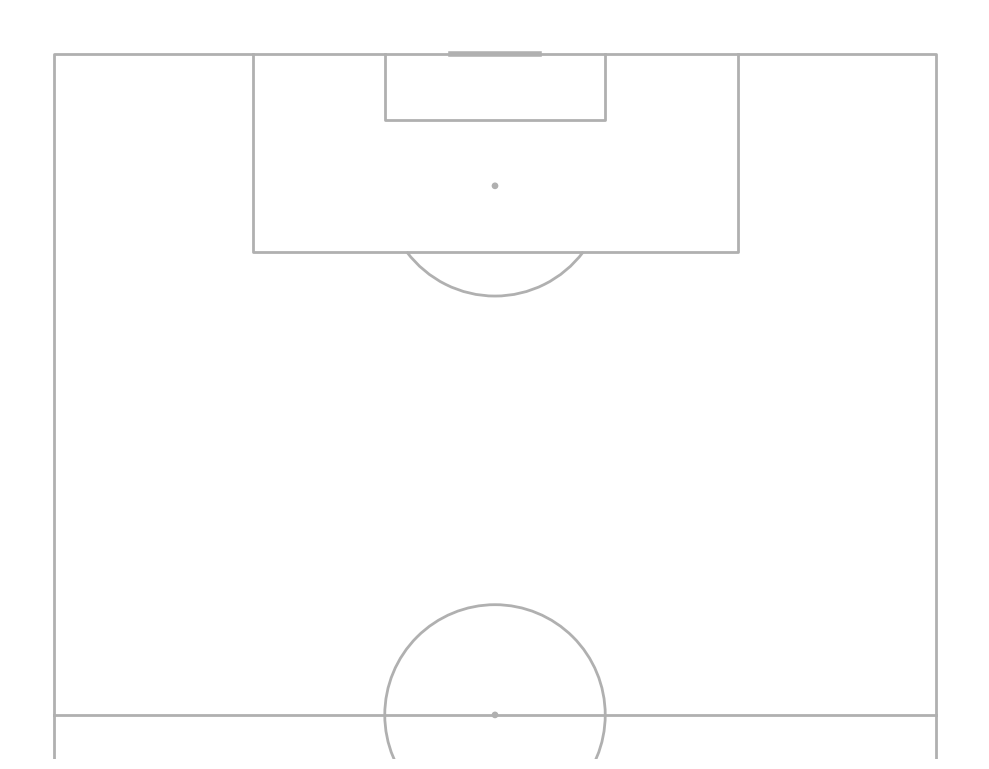

In [9]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10,8))

In [10]:
sc = pitch.scatter(x=df["start_location_x"],y= df["start_location_y"], ax=ax)

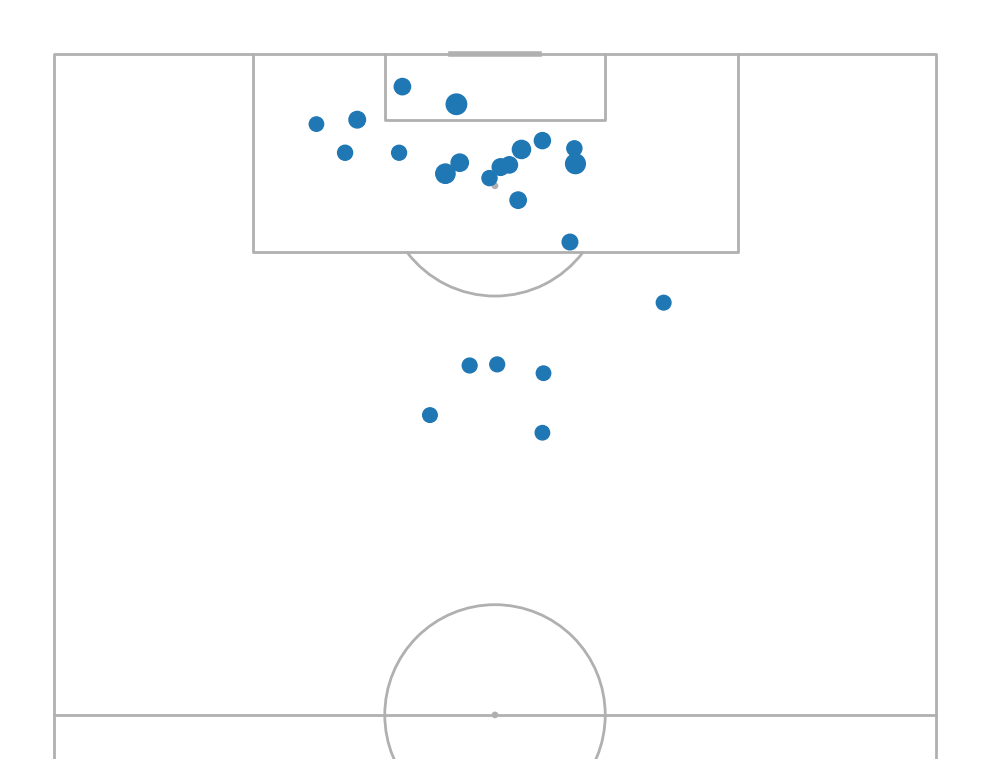

In [11]:
pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10,8))
sc = pitch.scatter(x=df["start_location_x"],y= df["start_location_y"], ax=ax, s=df["statsbomb_xg"] * 500 +100)

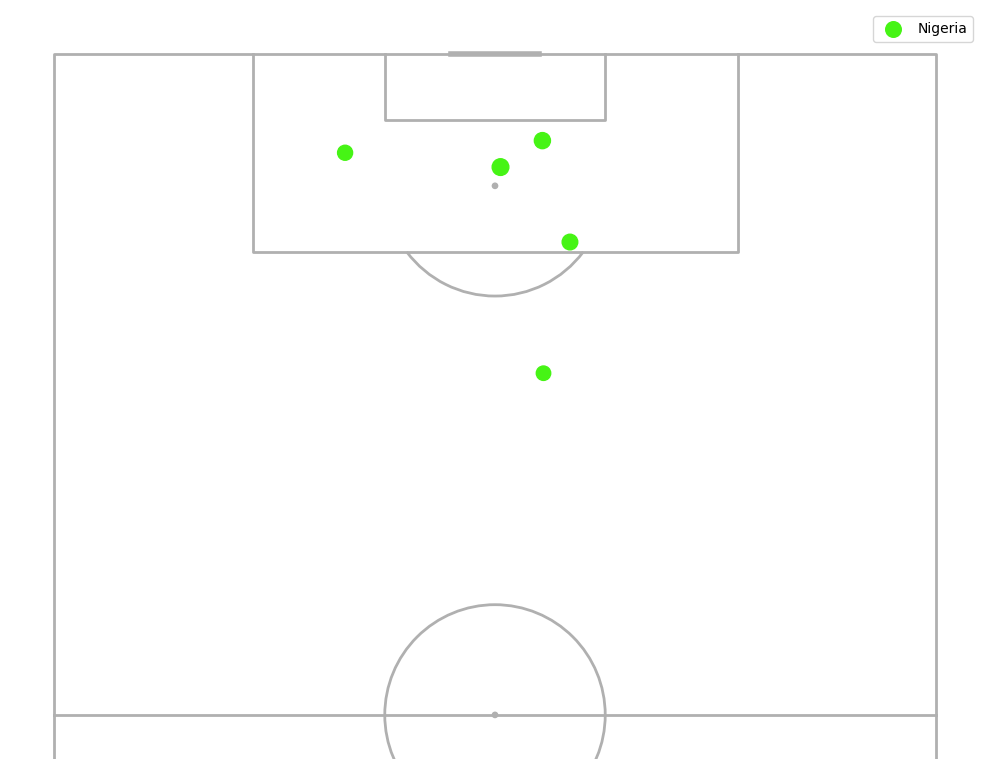

In [12]:
nigeria_color = "#46f415"
nigeria_df = df[df["team"] == 'Nigeria'].copy()

pitch = VerticalPitch(
    half=True
)
fig, ax = pitch.draw(figsize=(10,8))
nigeria_sc = pitch.scatter(
    x=nigeria_df["start_location_x"],
    y= nigeria_df["start_location_y"], 
    ax=ax, 
    c=nigeria_color,
    label="Nigeria",
    s=nigeria_df["statsbomb_xg"] * 500 +100
)
ax.legend()